In [56]:
import pandas as pd

In [57]:
Data = pd.read_csv('responses.csv')
DataRelevantColumn = Data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,73,74,75,133,136,138,139,140,141,142,143,144,145,146,147,148,149]].copy()
DataRelevantColumn = DataRelevantColumn.dropna()
DataRelevantColumnMusicLifestyle = DataRelevantColumn.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].copy()
print('Smoking:')
print(DataRelevantColumnMusicLifestyle['Smoking'].value_counts())
print()
print('Alcohol:')
print(DataRelevantColumnMusicLifestyle['Alcohol'].value_counts())

Smoking:
tried smoking     374
never smoked      180
current smoker    161
former smoker     159
Name: Smoking, dtype: int64

Alcohol:
social drinker    581
drink a lot       193
never             100
Name: Alcohol, dtype: int64


We perform a unique value analysis to get the different data types involved in the column. Then, we perform mapping of the values to certain number variables.

In [58]:
mydict = {
   "tried smoking":3,
    "never smoked":4,
    "current smoker":1,
    "former smoker":2,
    "social drinker":2,
    "drink a lot":1,
    "never":3
}

for i in [19,20]:
    DataRelevantColumnMusicLifestyle.iloc[:, i] = DataRelevantColumnMusicLifestyle.iloc[:, i].map(mydict)

Then we obtain a health indicator for the dataset

In [59]:
DataRelevantColumnMusicHealthIndicator = DataRelevantColumnMusicLifestyle.copy()
DataRelevantColumnMusicHealthIndicator["HI"] = DataRelevantColumnMusicHealthIndicator["Smoking"] + DataRelevantColumnMusicHealthIndicator["Alcohol"] + DataRelevantColumnMusicHealthIndicator["Healthy eating"]
DataRelevantColumnMusicHealthIndicator = DataRelevantColumnMusicHealthIndicator.drop(columns=['Smoking','Alcohol','Healthy eating'])

# Machine Learning Model to predict and analyse

We are just done cleaning the data, now we will perform machine learning to the dataset.

In [60]:
from sklearn.model_selection import train_test_split

# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.metrics import accuracy_score

## Correlation between health index and music preferences

Predict the health index of a person given a following music preferences

In [61]:
target = DataRelevantColumnMusicHealthIndicator['HI'] # this is the dependent variable
x_train, x_test, y_train, y_test = train_test_split(DataRelevantColumnMusicHealthIndicator, target, random_state = 42)
x_train1 = x_train.drop(['HI'], axis=1)
x_test1 = x_test.drop(['HI'], axis=1)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

Using a written function to calculate the accuracy of different models

In [62]:
def modeltraining(clf):
    scoring = 'accuracy'
    score = cross_val_score(clf, x_train1, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
    print(round(np.mean(score)*100, 2))

Then we obtain the accuracy score of the different models

In [63]:
modeltraining(KNeighborsClassifier(n_neighbors = 13))
modeltraining(DecisionTreeClassifier())
modeltraining(RandomForestClassifier(n_estimators=13))
modeltraining(GaussianNB())
modeltraining(SVC(gamma='scale'))
modeltraining(LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42))

20.91
16.49
19.24
8.85
22.3


C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

22.74


C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [67]:
def svmScore(c = 1, gam = 'scale', ker ='rbf'):
    svMachine = SVC(C = c, kernel = ker, gamma = gam)
    svMachine.fit(x_train1, y_train)
    y_pred = svMachine.predict(x_test1)
    print(accuracy_score(y_test, y_pred))

In [68]:
# compare different kernels
# the gamma is default to be 1 / n_features
kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    svmScore(ker = k)

0.2694063926940639
0.2374429223744292
0.2328767123287671


In [72]:
#Random Forest
n_trees = np.arange(1, 20, 4) # build a array contains values form 1 to 100 with step of 4

# for each n, we want to check the accuracy of random forest with n trees
for n in n_trees:
    rdf = RandomForestClassifier(n_estimators = n, random_state = 42)
    rdf.fit(x_train1, y_train)
    # we will print both the number of trees, and the accuracy score
    print(n)
    print(accuracy_score(y_test, rdf.predict(x_test1)))

1
0.2009132420091324
5
0.2146118721461187
9
0.2054794520547945
13
0.2100456621004566
17
0.2100456621004566


In [73]:
rdForest = RandomForestClassifier(n_estimators = 13, random_state = 42)
rdForest.fit(x_train1, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### To predict the health indicator of a person given a following set of music preferences

In [75]:
rdForest.predict([[5,2,3,3,3,3,4,5,1,1,1,3,2,4,1,1,3,3,1]])

array([4.])

## Given the music preferences, do people make up any clusters of similar behavior?

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [78]:
MusicSimilarBehaviour = Data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].copy()
MusicSimilarBehaviour = MusicSimilarBehaviour.dropna()

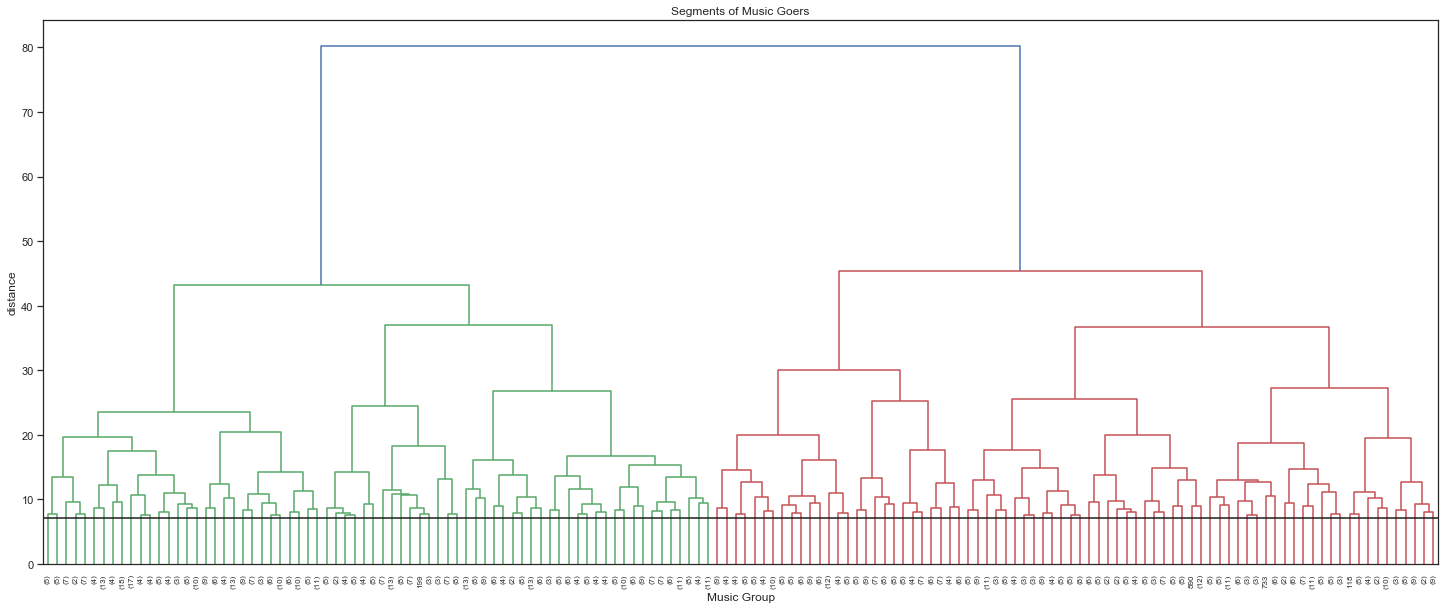

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(MusicSimilarBehaviour, 'ward')

# set cut-off to 150 cluster merges
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Segments of Music Goers')
plt.xlabel('Music Group')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [80]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=4)
clustering.fit(MusicSimilarBehaviour);

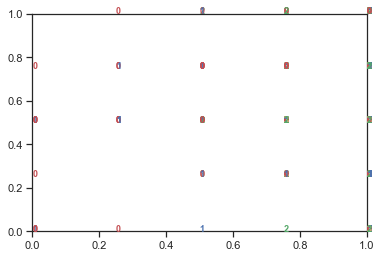

In [81]:
# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(MusicSimilarBehaviour)

colours = 'rbgy'
for i in range(MusicSimilarBehaviour.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[clustering.labels_[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

Append the clustering labels

In [82]:
MusicSimilarBehaviour['labels'] = clustering.labels_

In [83]:
DataSpendingBehaviourWithUserCategory = DataRelevantColumn.iloc[:,[22,23,24]].copy()
DataSpendingBehaviourWithUserCategory.head()

,Finances,Entertainment spending,Spending on gadgets
0,3.0,3.0,1
1,3.0,4.0,5
2,2.0,4.0,4
3,2.0,3.0,4
4,4.0,3.0,2


In [85]:
DataSpendingBehaviourWithUserCategory["labels"] = MusicSimilarBehaviour["labels"]

In [86]:
DataSpendingBehaviourWithUserCategory.head()

,Finances,Entertainment spending,Spending on gadgets,labels
0,3.0,3.0,1,0
1,3.0,4.0,5,2
2,2.0,4.0,4,1
3,2.0,3.0,4,2
4,4.0,3.0,2,3


We create a new column on spending indicators.
SI refers to spending indicator and it is an indicator of the different labels' spending power.

In [87]:
DataSpendingBehaviourWithUserCategory["SI"] = DataSpendingBehaviourWithUserCategory["Entertainment spending"] + DataSpendingBehaviourWithUserCategory["Spending on gadgets"] - DataSpendingBehaviourWithUserCategory["Finances"]
DataSpendingBehaviourWithUserCategoryLean = DataSpendingBehaviourWithUserCategory.drop(columns = ["Finances","Entertainment spending","Spending on gadgets"]).copy()

C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


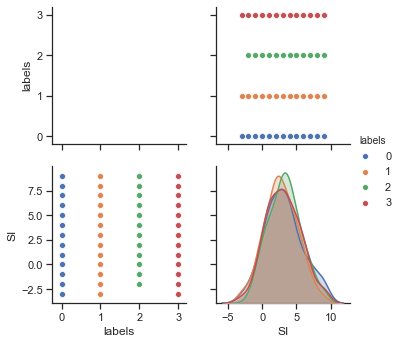

In [88]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(DataSpendingBehaviourWithUserCategoryLean, hue="labels")

In [89]:
#We perform this to determine the bin sizes of the spending indicator
DataSpendingBehaviourWithUserCategoryLean['SI'].describe()

count    874.000000
mean       3.062929
std        2.547945
min       -3.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        9.000000
Name: SI, dtype: float64

In [90]:
DataSpendingBehaviourWithUserCategoryLean["SI"] = DataSpendingBehaviourWithUserCategoryLean["SI"] + 3
#Scaling the data columns 
DataSpendingBehaviourWithUserCategoryLean.loc[(DataSpendingBehaviourWithUserCategoryLean['SI'] < 3), 'Spending Group'] = "Low Spend"
DataSpendingBehaviourWithUserCategoryLean.loc[(DataSpendingBehaviourWithUserCategoryLean['SI'] >= 3) & (DataSpendingBehaviourWithUserCategoryLean['SI'] < 6), 'Spending Group'] = "Med Spend"
DataSpendingBehaviourWithUserCategoryLean.loc[(DataSpendingBehaviourWithUserCategoryLean['SI'] >= 6) & (DataSpendingBehaviourWithUserCategoryLean['SI'] < 9), 'Spending Group'] = "High Spend"
DataSpendingBehaviourWithUserCategoryLean.loc[(DataSpendingBehaviourWithUserCategoryLean['SI'] >= 9) & (DataSpendingBehaviourWithUserCategoryLean['SI'] <= 12), 'Spending Group'] = "Very High Spend"

In [91]:
DataSpendingBehaviourWithUserCategoryLean.head()

,labels,SI,Spending Group
0,0,4.0,Med Spend
1,2,9.0,Very High Spend
2,1,9.0,Very High Spend
3,2,8.0,High Spend
4,3,4.0,Med Spend


Hence from  here we know that customer group label with their corresponding spending power.

In [92]:
def bar_chart(feature):
    Low_Spend = DataSpendingBehaviourWithUserCategoryLean[DataSpendingBehaviourWithUserCategoryLean['Spending Group']=='Low Spend'][feature].value_counts()
    Med_Spend = DataSpendingBehaviourWithUserCategoryLean[DataSpendingBehaviourWithUserCategoryLean['Spending Group']=='Med Spend'][feature].value_counts()
    High_Spend = DataSpendingBehaviourWithUserCategoryLean[DataSpendingBehaviourWithUserCategoryLean['Spending Group']=='High Spend'][feature].value_counts()
    Very_High_Spend = DataSpendingBehaviourWithUserCategoryLean[DataSpendingBehaviourWithUserCategoryLean['Spending Group']=='Very High Spend'][feature].value_counts()
    df = pd.DataFrame([Low_Spend,Med_Spend,High_Spend,Very_High_Spend, ((High_Spend + Very_High_Spend)/(Low_Spend+Med_Spend+High_Spend+Very_High_Spend))*100])
    df.index = ['Low_Spend','Med_Spend','High_Spend','Very_High_Spend',"Proportation of high spenders"]
    print(df)
    df.plot(kind='bar',stacked=True, figsize=(10,5))

                                       0          1          2          3
Low_Spend                      20.000000  21.000000   7.000000  13.000000
Med_Spend                      87.000000  98.000000  51.000000  73.000000
High_Spend                     96.000000  99.000000  76.000000  83.000000
Very_High_Spend                48.000000  35.000000  29.000000  38.000000
Proportation of high spenders  57.370518  52.964427  64.417178  58.454106


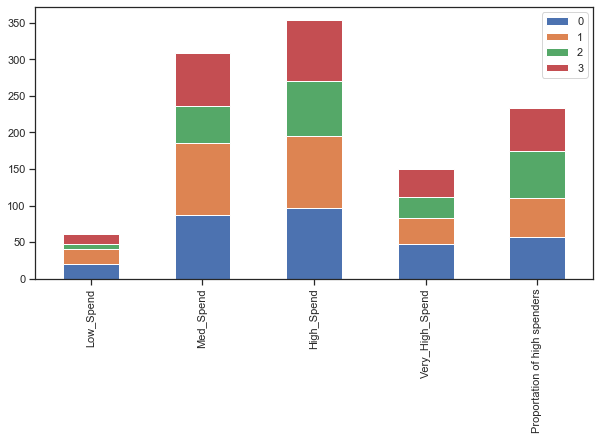

In [93]:
bar_chart("labels")

In [94]:
musicPreferences= MusicSimilarBehaviour.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].copy()
musicPreferences.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,labels
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,2
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,1
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,2
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,3


In [95]:
def Label_Mean(label):
    is2 = musicPreferences['labels'] == label
    musicPreferencesLabel = musicPreferences[is2]
    musicPreferencesLabelMusicGenre = musicPreferencesLabel.drop(columns=['Music'])

    columns = ['genre','average']
    index = range(0,len(musicPreferencesLabelMusicGenre.columns))

    label2 = pd.DataFrame(index=index, columns=columns)
    label2['genre'] = list(musicPreferencesLabelMusicGenre.columns.values)
    label2['average'] = list(musicPreferencesLabelMusicGenre.mean(axis=0).values)

    isMax = label2['average'] == musicPreferencesLabelMusicGenre.mean(axis=0).max()
    label2Max = label2[isMax]
    print(label2Max.head())

In [96]:
Label_Mean(0)
Label_Mean(1)
Label_Mean(2)
Label_Mean(3)

  genre   average
6   Pop  3.646617
  genre   average
7  Rock  4.225092
  genre   average
7  Rock  4.497143
  genre   average
6   Pop  4.018265


From the analysis, label 2 (with the highest spending power among the four clusters) have preference for rock music the most.
Should focus merchandise on pop and rock music.

## Analysis on demographics of young people into which labels

Next we will analyse the spendings based on demographics

In [49]:
SpendingBasedOnDemographics = DataRelevantColumn.iloc[:,[26,27,28,29,30,31,32,33,34,35]].copy()
SpendingBasedOnDemographics["labels"] = musicPreferences["labels"]
SpendingBasedOnDemographics.head(10)

,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,labels
0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,0
1,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,2
2,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats,1
3,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,2
4,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow,3
5,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats,2
6,20.0,177.0,50.0,1.0,female,right handed,secondary school,no,village,house/bungalow,0
7,19.0,184.0,90.0,1.0,male,right handed,college/bachelor degree,no,city,house/bungalow,0
9,19.0,174.0,60.0,3.0,female,right handed,secondary school,no,city,block of flats,1
10,19.0,175.0,60.0,2.0,female,left handed,secondary school,no,city,block of flats,0


In [50]:
def EncodeCol(col):
    #encode all variables
    from sklearn import preprocessing 

    # label_encoder object knows how to understand word labels. 
    label_encoder = preprocessing.LabelEncoder() 

    # Encode labels in column 'species'. 
    y = label_encoder.fit_transform(SpendingBasedOnDemographics[col]) 
    newLabel = col + '_encoded'
    
    SpendingBasedOnDemographics[newLabel] = y

In [51]:
listColumns = list(SpendingBasedOnDemographics.columns.values)

for i in range(4,10):
    EncodeCol(listColumns[i])

In [52]:
#Data Dictionary
print(SpendingBasedOnDemographics.iloc[:,[4,11]].drop_duplicates())
print(SpendingBasedOnDemographics.iloc[:,[5,12]].drop_duplicates())
print(SpendingBasedOnDemographics.iloc[:,[6,13]].drop_duplicates())
print(SpendingBasedOnDemographics.iloc[:,[7,14]].drop_duplicates())
print(SpendingBasedOnDemographics.iloc[:,[8,15]].drop_duplicates())
print(SpendingBasedOnDemographics.iloc[:,[9,16]].drop_duplicates())

   Gender  Gender_encoded
0  female               0
5    male               1
   Left - right handed  Left - right handed_encoded
0         right handed                            1
10         left handed                            0
                            Education  Education_encoded
0             college/bachelor degree                  0
2                    secondary school                  5
11                     primary school                  4
33                     masters degree                  3
156                  doctorate degree                  2
158  currently a primary school pupil                  1
  Only child  Only child_encoded
0         no                   0
3        yes                   1
  Village - town  Village - town_encoded
0        village                       1
1           city                       0
  House - block of flats  House - block of flats_encoded
0         block of flats                               0
3         house/bungalow       

In [53]:
DemographicsToLabels = SpendingBasedOnDemographics.iloc[:,[1,2,3,10,11,12,13,14,15,16]].copy()
DemographicsToLabels.head()

,Height,Weight,Number of siblings,labels,Gender_encoded,Left - right handed_encoded,Education_encoded,Only child_encoded,Village - town_encoded,House - block of flats_encoded
0,163.0,48.0,1.0,0,0,1,0,0,1,0
1,163.0,58.0,2.0,2,0,1,0,0,0,0
2,176.0,67.0,2.0,1,0,1,5,0,0,0
3,172.0,59.0,1.0,2,0,1,0,1,0,1
4,170.0,59.0,1.0,3,0,1,5,0,1,1


In [97]:
target = DemographicsToLabels['labels'] # this is the dependent variable
x_train, x_test, y_train, y_test = train_test_split(DemographicsToLabels, target, random_state = 42)
x_train1 = x_train.drop(['labels'], axis=1)
x_test1 = x_test.drop(['labels'], axis=1)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [98]:
# for each n, we want to check the accuracy of random forest with n trees
for n in n_trees:
    rdf = RandomForestClassifier(n_estimators = n, random_state = 42)
    rdf.fit(x_train1, y_train)
    # we will print both the number of trees, and the accuracy score
    print(n)
    print(accuracy_score(y_test, rdf.predict(x_test1)))

1
0.2557077625570776
5
0.2237442922374429
9
0.2511415525114155
13
0.228310502283105
17
0.2511415525114155


In [99]:
rdForest = RandomForestClassifier(n_estimators = 9, random_state = 42)
rdForest.fit(x_train1, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [101]:
rdForest.predict([[159,50,2,0,1,5,0,1,1]])

array([1], dtype=int64)

Therefore, a girl 159cm, weight 50kg, who has two siblings, is right handed and has a college degree belongs to label 1 and hence will likely to have a music preference of Rock.